In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('C:\\Users\\user\\Twitter analysis Project\\data\\processed_tweets.csv')

In [4]:
df.head(10)

,text,date,user,location,keyword,scores,label,cleaned_text
0,To “the vaccine have side effects” crowd If yo...,5/9/2021 18:20,thischeena,NaN,vaccine,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,"['vaccine', 'side', 'effect', 'crowd', 'scruti..."
1,From my own observation I don't see that comin...,5/9/2021 18:20,mokwenalebogan3,"Pretoria, South Africa",vaccine,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,"['observation', 'see', 'coming', 'especially',..."
2,‘Grow the f*ck up and get the vaccine’ — These...,5/9/2021 18:20,rewir8rh83,"ÜT: 37.678799,-120.987029",vaccine,"{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'comp...",Positive,"['grow', 'f', 'ck', 'get', 'vaccine', 'health'..."
3,Whoever I speak to abroad speaks very highly o...,5/9/2021 18:20,monambuj,NaN,vaccine,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,"['whoever', 'speak', 'abroad', 'speaks', 'high..."
4,Kejriwal must rank as the shiftiest politician...,5/9/2021 18:20,Md_Ayesha_,"Dubai, United Arab Emirates",vaccine,"{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'comp...",Negative,"['kejriwal', 'must', 'rank', 'shiftiest', 'pol..."
5,Me two hours ago: this vaccine ain’t sh*t Me now:,5/9/2021 18:20,mihu0307,By Liliana's side | She/They |,vaccine,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,"['two', 'hour', 'ago', 'vaccine', 'ha', 'sh']"
6,It's moving really quick. I was not priority a...,5/9/2021 18:20,kpnov23,NaN,vaccine,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,"['ha', 'moving', 'really', 'quick', 'wa', 'pri..."
7,Dracula's castle in Romania offers tourists Co...,5/9/2021 18:20,warlockthunder1,"Oakville, Ontario",vaccine,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,"['dracula', 'castle', 'romania', 'offer', 'tou..."
8,While all the Twitheads out there are preachin...,5/9/2021 18:20,kadb99,NaN,vaccine,"{'neg': 0.13, 'neu': 0.87, 'pos': 0.0, 'compou...",Negative,"['twitheads', 'preaching', 'getting', 'fda', '..."
9,have you seen the photo on our vaccine certifi...,5/9/2021 18:20,MANJITSINGHARYA,haryana (india),vaccine,"{'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'comp...",Positive,"['seen', 'photo', 'vaccine', 'certificate', 'l..."


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(ngram_range=(1,2))
tweets_countvectorizer = vectorizer.fit_transform(df['cleaned_text'])
tweets_countvectorizer

<40541x259477 sparse matrix of type '<class 'numpy.int64'>'
	with 782012 stored elements in Compressed Sparse Row format>

#  TRAIN A NAIVE BAYES CLASSIFIER MODEL

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweets_countvectorizer, df['label'],
                                                    test_size=0.2, random_state=69)

In [7]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (32432, 259477)
X_test_shape :  (8109, 259477)
y_train_shape :  (32432,)
y_test_shape :  (8109,)


# ASSESS TRAINED MODEL PERFORMANCE 

In [8]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

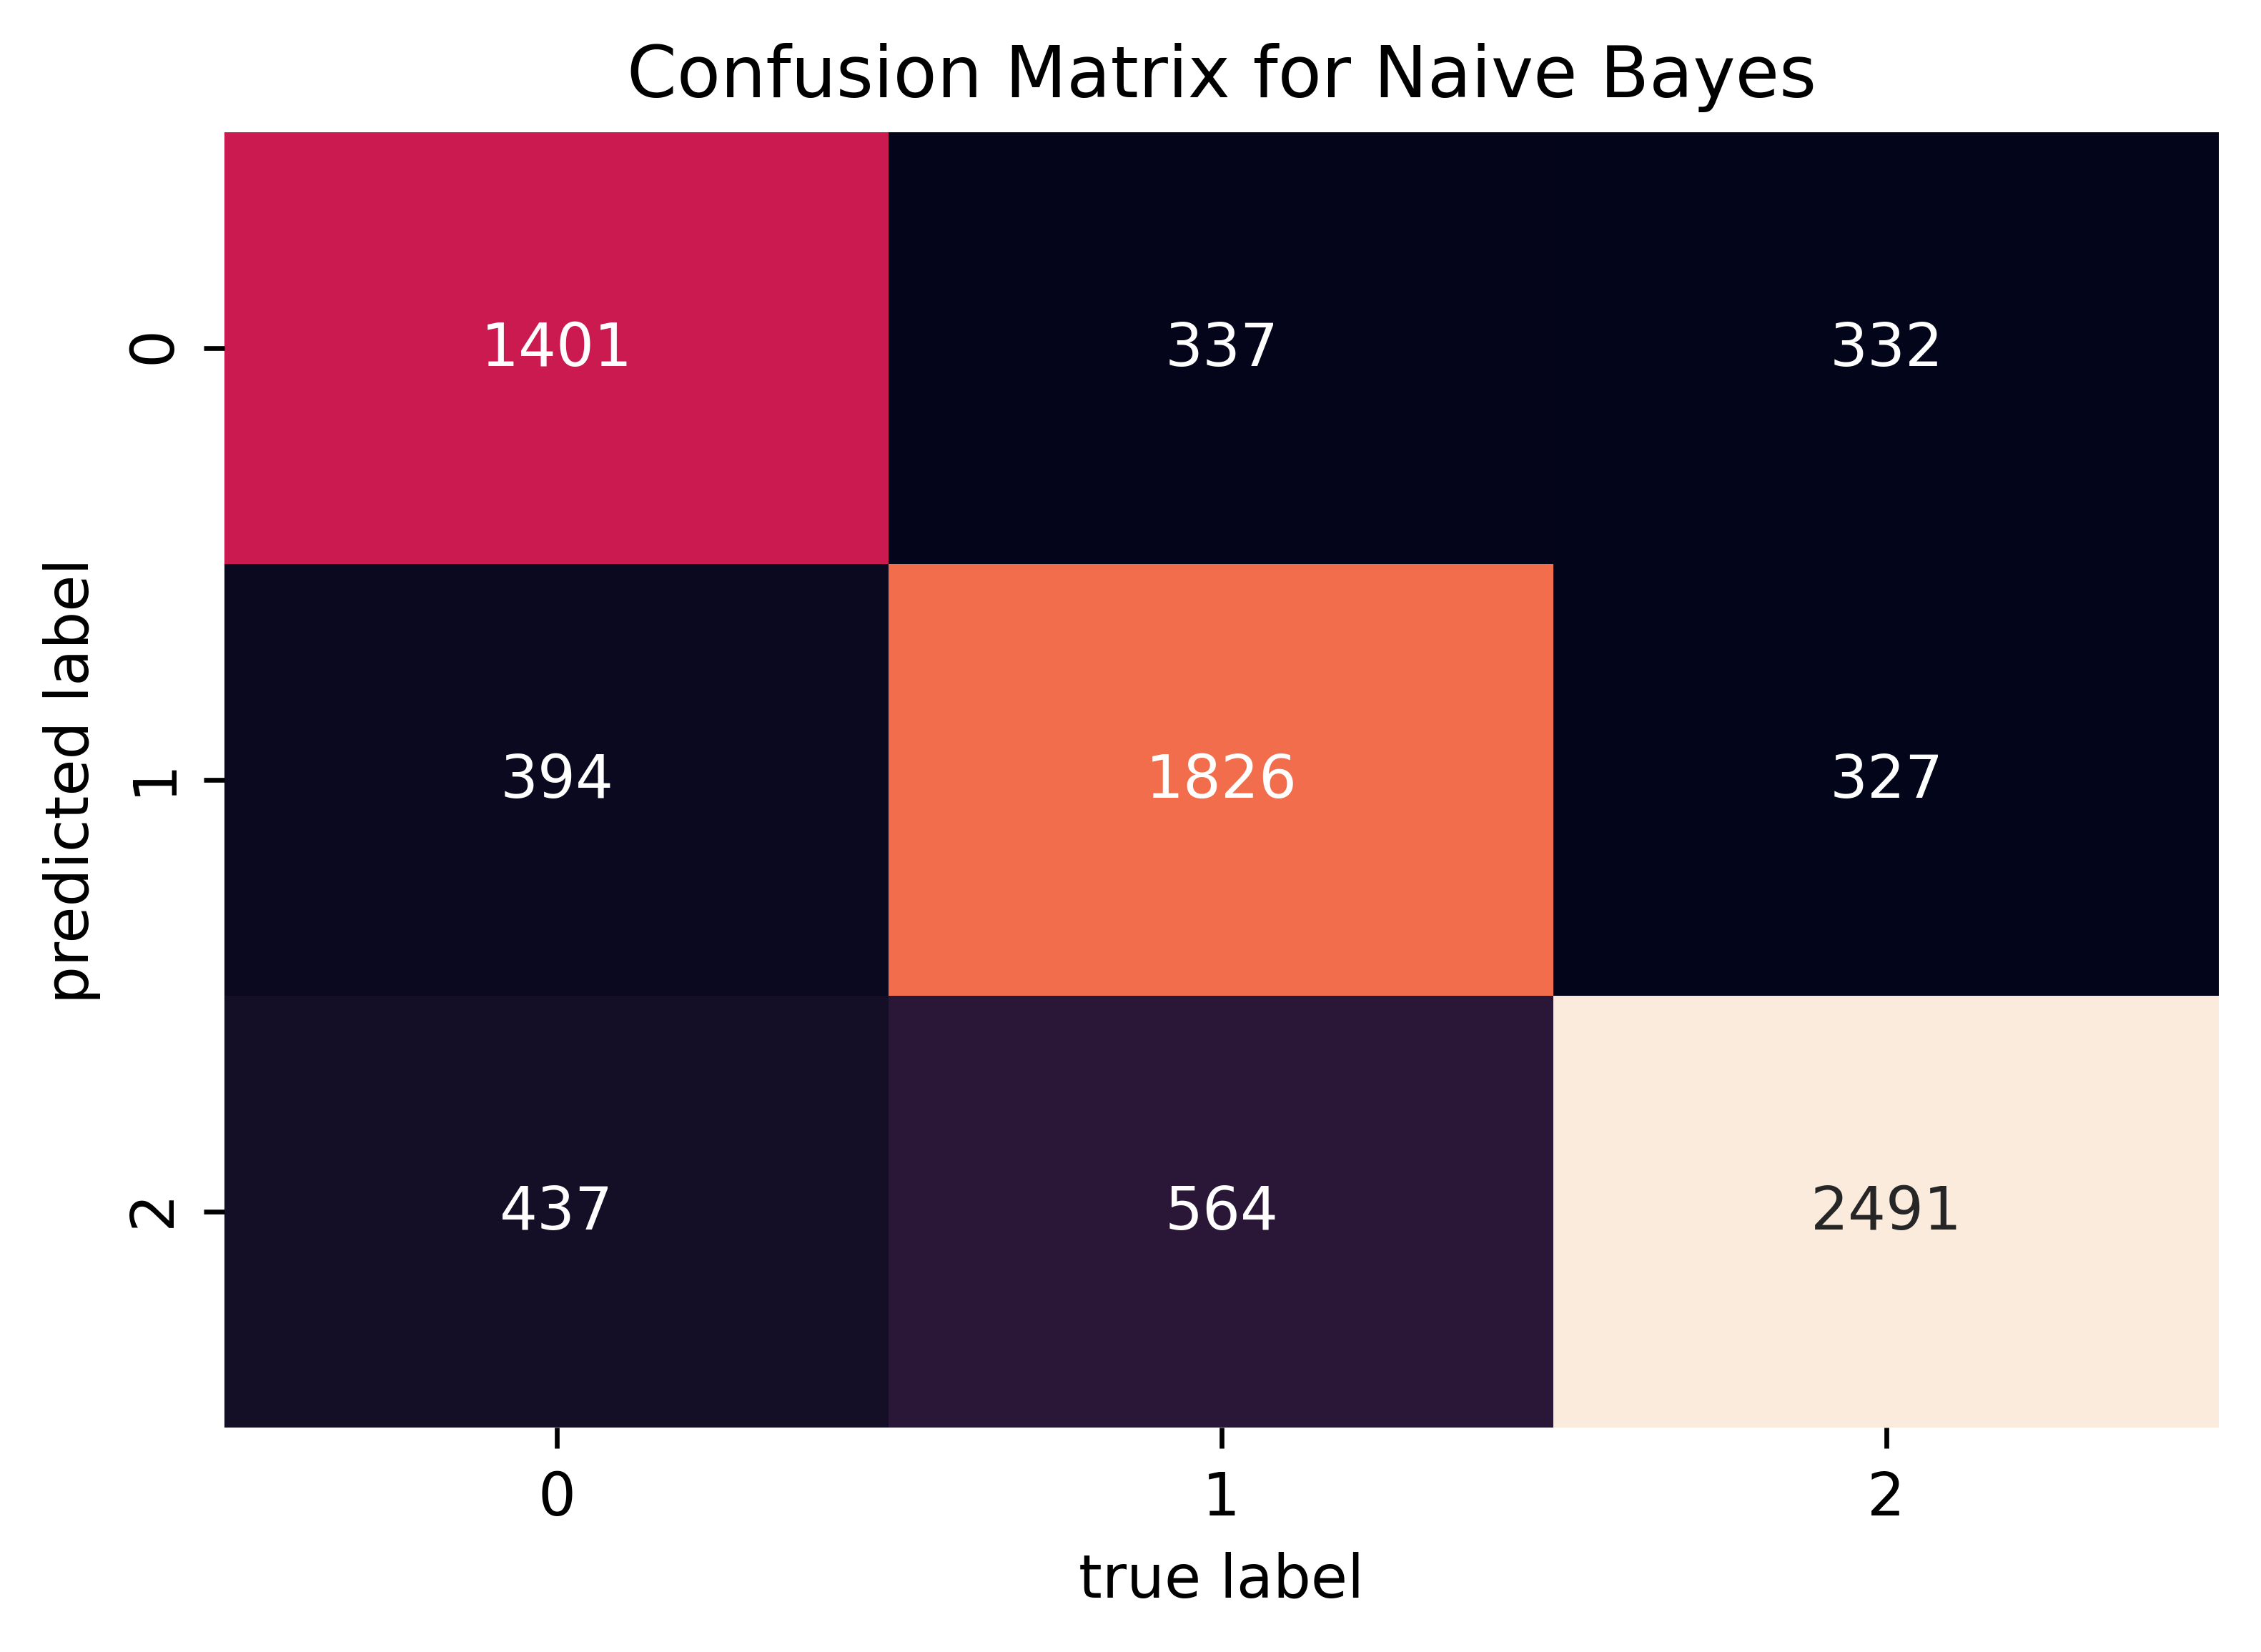

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("C:\\Users\\user\\Twitter analysis Project\\data\\confusion_matrix.png")
plt.show()

In [14]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.7051424343322235


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_naive))

              precision    recall  f1-score   support

    Negative       0.68      0.63      0.65      2232
     Neutral       0.72      0.67      0.69      2727
    Positive       0.71      0.79      0.75      3150

    accuracy                           0.71      8109
   macro avg       0.70      0.70      0.70      8109
weighted avg       0.70      0.71      0.70      8109

